# Handwritten Digit Recognition (PART1) 🚀

In this notebook, we're embarking on an exciting journey to develop a basic understanding of building and training a neural network for recognizing handwritten digits using PyTorch. We'll dive into the world of the MNIST dataset 📊, a classic in the machine learning community, renowned for its collection of black and white images of digits from 0 to 9.


This lab is designed to empower you with key skills and concepts in deep learning:

    🧠 Understand Gradient Descent from Scratch
    📚 Load Dataset using PyTorch
    🏗️ Build a Neural Network using PyTorch
    🚀 Start the training script and watch your neural network learn!

Let's get started and unlock the potential of neural networks in digit recognition! 💡🔍




## PART1: Gradient Descent
GD is an algorithm that help us find the minimum of the error function. It is an important algorithm used in all deep learning projects.

In this first part, we are going to develop GD from scratch to learn how it works. We are going to go through GD using our example in the course (pass/fail).

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [ ]:
# DO NOT TOUCH (These are helper function)
# Some helper functions for plotting and drawing lines
def plot_points(X, y):
    passed = X[np.argwhere(y==1)]
    failed = X[np.argwhere(y==0)]
    plt.scatter([s[0][0] for s in failed], [s[0][1] for s in failed], s = 25, color = 'blue', edgecolor = 'k')
    plt.scatter([s[0][0] for s in passed], [s[0][1] for s in passed], s = 25, color = 'red', edgecolor = 'k')

def display(m, b, color='g--'):
    plt.xlim(-0.05,1.05)
    plt.ylim(-0.05,1.05)
    x = np.arange(-10, 10, 0.1)
    plt.plot(x, m*x+b, color)

In [ ]:
# DO NOT CHANGE
# Generating random dataset.
import numpy as np
import matplotlib.pyplot as plt

# Set seed for reproducibility
np.random.seed(0)

mean_pass = [0.5, 0.8]
cov_pass = [[0.01, 0], [0, 0.02]]  # Diagonal covariance

mean_fail = [0.3, 0.3]
cov_fail = [[0.01, 0], [0, 0.02]]

# Generate 'pass' and 'fail' data
pass_students = np.random.multivariate_normal(mean_pass, cov_pass, 50)
fail_students = np.random.multivariate_normal(mean_fail, cov_fail, 50)

# Create dataframes for pass and fail students
df_pass = pd.DataFrame(pass_students, columns=['Hours', 'Attendance'])
df_pass['Label'] = 1

df_fail = pd.DataFrame(fail_students, columns=['Hours', 'Attendance'])
df_fail['Label'] = 0

# Combine the two dataframes into one
df = pd.concat([df_pass, df_fail], ignore_index=True)

df.head()

,Hours,Attendance,Label
0,0.540016,1.049475,1
1,0.724089,0.938414,1
2,0.402272,1.064113,1
3,0.484864,0.934363,1
4,0.541060,0.785403,1


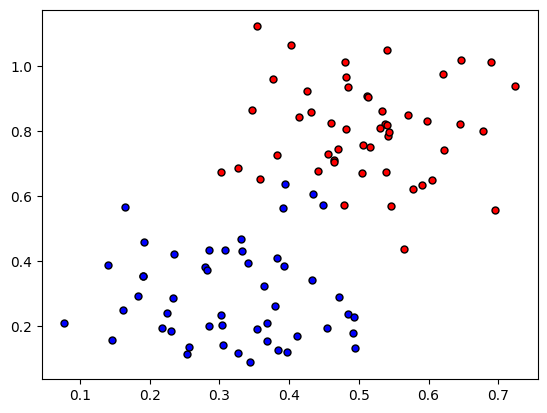

In [ ]:
X = np.array(df[["Hours","Attendance"]])
y = np.array(df['Label'])
plot_points(X,y)
plt.show()

## TODO: Implementing the basic functions
Here is your turn to shine. Implement the following formulas, as explained in the text.
- Sigmoid activation function

$$\sigma(x) = \frac{1}{1+e^{-x}}$$

- Output (prediction) formula

$$\hat{y} = \sigma(w_1 x_1 + w_2 x_2 + b)$$

- Error function

$$Error(y, \hat{y}) = - y \log(\hat{y}) - (1-y) \log(1-\hat{y})$$

- The function that updates the weights

$$ w_i \longrightarrow w_i + \alpha (y - \hat{y}) x_i$$

$$ b \longrightarrow b + \alpha (y - \hat{y})$$

In [ ]:
# TODO: Implement the following functions
# Activation (sigmoid) function
def sigmoid(x):
    return 1/(1+np.exp(-x))

# Output (prediction) formula
def output_formula(features, weights, bias):
    return sigmoid(np.dot(features,weights)+bias)

# Error (log-loss) formula
def error_formula(y, output):
    return -y*np.log(output) -(1-y)*np.log(1-output)


# Gradient descent step
def update_weights(x, y, weights, bias, learnrate):
    output = output_formula(x, weights, bias)
    error = y-output
    weights +=learnrate*error*x
    bias +=learnrate*error
    return weights, bias

### Training Function (using GD)

In [ ]:
# TODO: Complete this code
np.random.seed(44)
epochs =500
learnrate =0.01

def train(features, targets, epochs, learnrate, graph_lines=False):
    errors = []
    n_records, n_features = features.shape
    last_loss = None
    weights = np.random.normal(scale=1 / n_features**.5, size=n_features)
    bias = 0

    # CHANGE HERE
    for e in range(epochs):
        del_w = np.zeros(weights.shape)
        for x, y in zip(features, targets):
            output =output_formula(x,weights,bias)
            error =y-output
            weights, bias =update_weights(x,y,weights,bias,learnrate)

        # STOP CHANGING
        # Printing out the log-loss error on the training set
        out = output_formula(features, weights, bias)
        loss = np.mean(error_formula(targets, out))
        errors.append(loss)
        if e % (epochs / 10) == 0:
            print("\n========== Epoch", e,"==========")
            if last_loss and last_loss < loss:
                print("Train loss: ", loss, "  WARNING - Loss Increasing")
            else:
                print("Train loss: ", loss)
            last_loss = loss
            predictions = out > 0.5
            accuracy = np.mean(predictions == targets)
            print("Accuracy: ", accuracy)
        if graph_lines and e % (epochs / 100) == 0:
            display(-weights[0]/weights[1], -bias/weights[1])


    # Plotting the solution boundary
    plt.title("Solution boundary")
    display(-weights[0]/weights[1], -bias/weights[1], 'black')

    # Plotting the data
    plot_points(features, targets)
    plt.show()

    # Plotting the error
    plt.title("Error Plot")
    plt.xlabel('Number of epochs')
    plt.ylabel('Error')
    plt.plot(errors)
    plt.show()

###🏋️‍♂️ Training Time: Watch the Algorithm Learn!

By initiating the training function, we're going to witness our model's learning process in real-time! Here's what to expect as the magic unfolds:

* **Progress Updates:** Get ready for a series of 10 informative updates, complete with the current training loss and accuracy metrics. Watch as the numbers evolve, showcasing the algorithm's improvement with each epoch.

* **Visual Insights:** A dynamic plot will bring our data to life, along with the progression of boundary lines that our model generates. Keep an eye on the black line – that's our model's final hypothesis. Observe how each iteration nudges the boundaries closer to the ideal fit. It's like watching the algorithm's thought process visualized!

* **Error Trends:** Another plot will graph the journey of our error function. Anticipate a satisfying downward trend as the epochs roll by, indicating that our model is minimizing mistakes and maximizing precision.

So, let's hit 'Run' and watch the algorithm flex its computational muscles towards achieving peak performance! 🚀


========== Epoch 0 ==========
Train loss:  0.7833459381006445
Accuracy:  0.27

========== Epoch 50 ==========
Train loss:  0.37862906299382304
Accuracy:  0.96

========== Epoch 100 ==========
Train loss:  0.2678131151656223
Accuracy:  0.95

========== Epoch 150 ==========
Train loss:  0.21829200064704593
Accuracy:  0.95

========== Epoch 200 ==========
Train loss:  0.19011375267307468
Accuracy:  0.95

========== Epoch 250 ==========
Train loss:  0.1717599673117231
Accuracy:  0.95

========== Epoch 300 ==========
Train loss:  0.15875200558960942
Accuracy:  0.95

========== Epoch 350 ==========
Train loss:  0.14898923074699247
Accuracy:  0.95

========== Epoch 400 ==========
Train loss:  0.1413535519350097
Accuracy:  0.95

========== Epoch 450 ==========
Train loss:  0.13519334432705768
Accuracy:  0.95


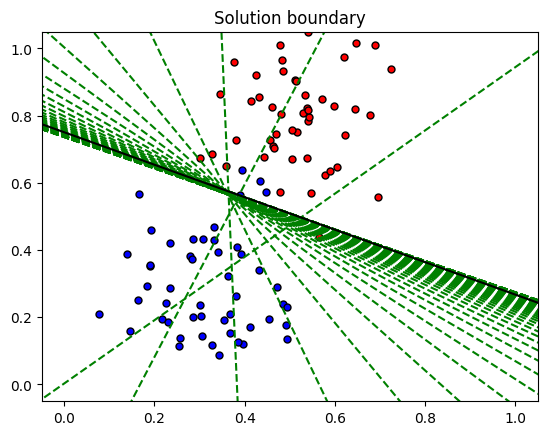

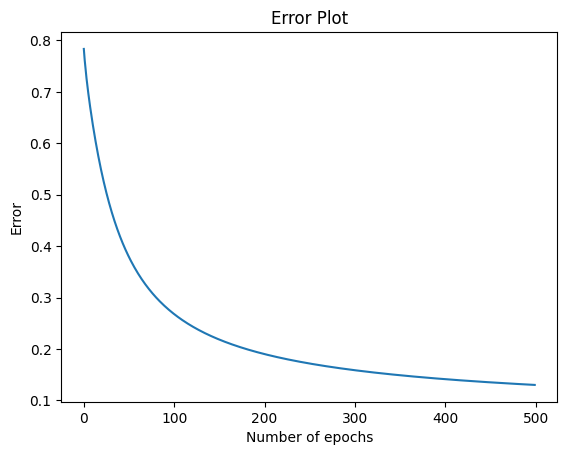

In [ ]:
train(X, y, epochs, learnrate, True)

Training with learning rate: 0.001

========== Epoch 0 ==========
Train loss:  1.0430492535126323
Accuracy:  0.5

========== Epoch 50 ==========
Train loss:  0.7554110941273616
Accuracy:  0.04

========== Epoch 100 ==========
Train loss:  0.6831063110566951
Accuracy:  0.5

========== Epoch 150 ==========
Train loss:  0.6266897374381305
Accuracy:  0.68

========== Epoch 200 ==========
Train loss:  0.5786719200917866
Accuracy:  0.81

========== Epoch 250 ==========
Train loss:  0.5375179714310017
Accuracy:  0.89

========== Epoch 300 ==========
Train loss:  0.5020762098673309
Accuracy:  0.92

========== Epoch 350 ==========
Train loss:  0.4713888227382866
Accuracy:  0.94

========== Epoch 400 ==========
Train loss:  0.4446634073470818
Accuracy:  0.94

========== Epoch 450 ==========
Train loss:  0.4212492343718741
Accuracy:  0.94


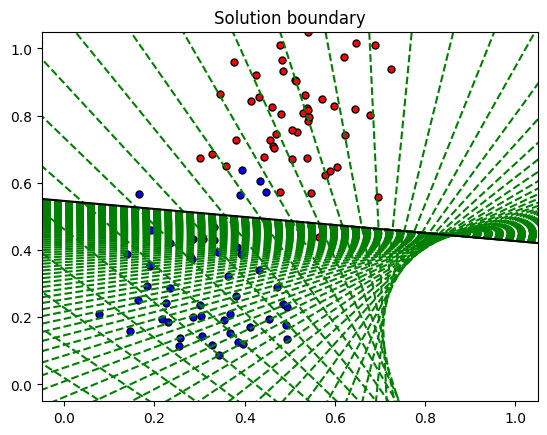

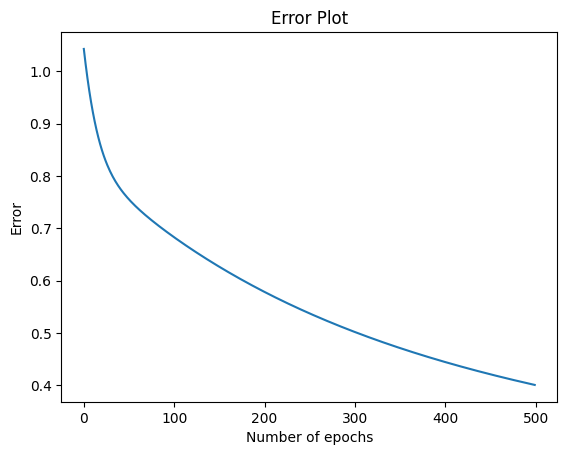

Training with learning rate: 0.01

========== Epoch 0 ==========
Train loss:  0.6470583853079649
Accuracy:  0.51

========== Epoch 50 ==========
Train loss:  0.3497150872901377
Accuracy:  0.95

========== Epoch 100 ==========
Train loss:  0.2562501413599306
Accuracy:  0.95

========== Epoch 150 ==========
Train loss:  0.21210186208637682
Accuracy:  0.95

========== Epoch 200 ==========
Train loss:  0.18622417731481844
Accuracy:  0.95

========== Epoch 250 ==========
Train loss:  0.16906508128682782
Accuracy:  0.95

========== Epoch 300 ==========
Train loss:  0.15675958328216263
Accuracy:  0.95

========== Epoch 350 ==========
Train loss:  0.14744687816821817
Accuracy:  0.95

========== Epoch 400 ==========
Train loss:  0.14011819035829767
Accuracy:  0.95

========== Epoch 450 ==========
Train loss:  0.1341775771491748
Accuracy:  0.95


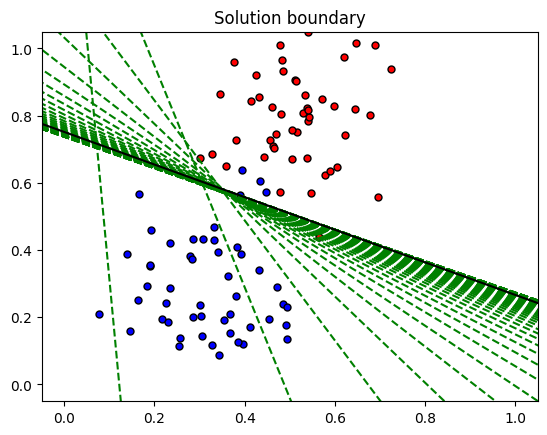

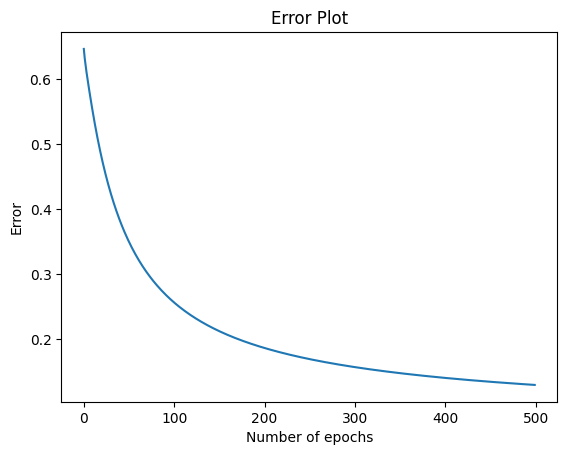

Training with learning rate: 0.1

========== Epoch 0 ==========
Train loss:  0.8047343246818645
Accuracy:  0.5

========== Epoch 50 ==========
Train loss:  0.1398698124134056
Accuracy:  0.97

========== Epoch 100 ==========
Train loss:  0.10977393554721121
Accuracy:  0.96

========== Epoch 150 ==========
Train loss:  0.0980933274858157
Accuracy:  0.96

========== Epoch 200 ==========
Train loss:  0.09170395438073933
Accuracy:  0.96

========== Epoch 250 ==========
Train loss:  0.08762745023215185
Accuracy:  0.96

========== Epoch 300 ==========
Train loss:  0.08478483538786014
Accuracy:  0.96

========== Epoch 350 ==========
Train loss:  0.0826839082127691
Accuracy:  0.96

========== Epoch 400 ==========
Train loss:  0.08106597521516502
Accuracy:  0.96

========== Epoch 450 ==========
Train loss:  0.0797812206235045
Accuracy:  0.96


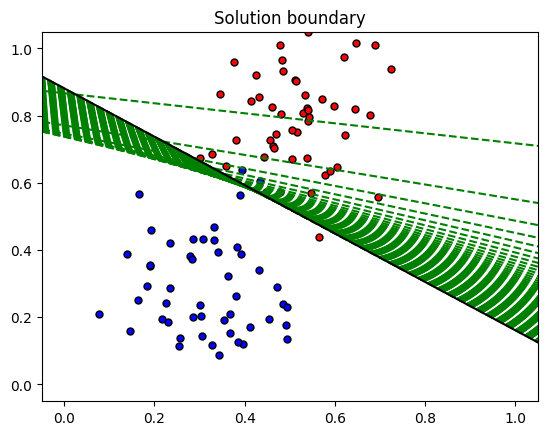

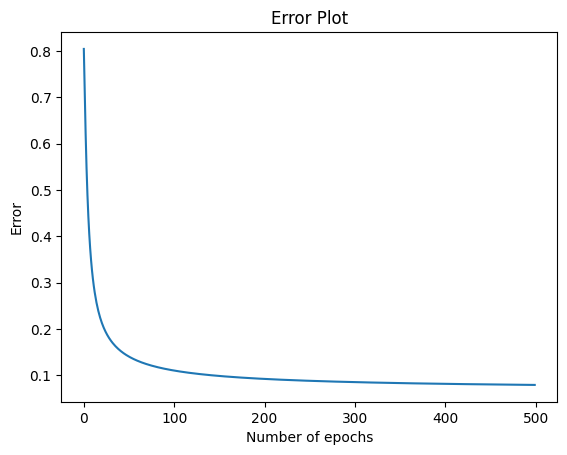

Training with learning rate: 0.3

========== Epoch 0 ==========
Train loss:  1.4370320685122258
Accuracy:  0.5

========== Epoch 50 ==========
Train loss:  0.12162783188725132
Accuracy:  0.96

========== Epoch 100 ==========
Train loss:  0.09841036460701094
Accuracy:  0.94

========== Epoch 150 ==========
Train loss:  0.09034198811441609
Accuracy:  0.95

========== Epoch 200 ==========
Train loss:  0.08621627503876818
Accuracy:  0.95

========== Epoch 250 ==========
Train loss:  0.08370919256118534
Accuracy:  0.95

========== Epoch 300 ==========
Train loss:  0.08202666787146287
Accuracy:  0.95

========== Epoch 350 ==========
Train loss:  0.08082179065104
Accuracy:  0.95

========== Epoch 400 ==========
Train loss:  0.07991847245442354
Accuracy:  0.95

========== Epoch 450 ==========
Train loss:  0.07921771844704614
Accuracy:  0.95


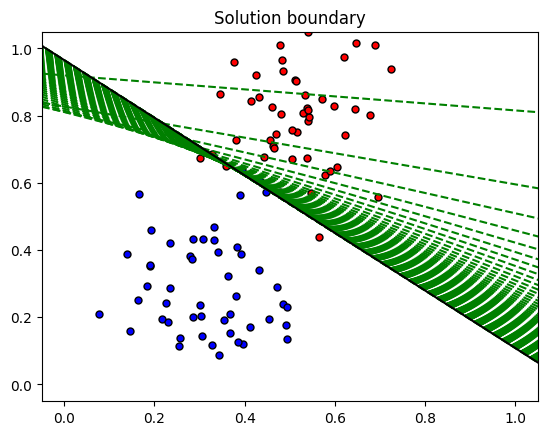

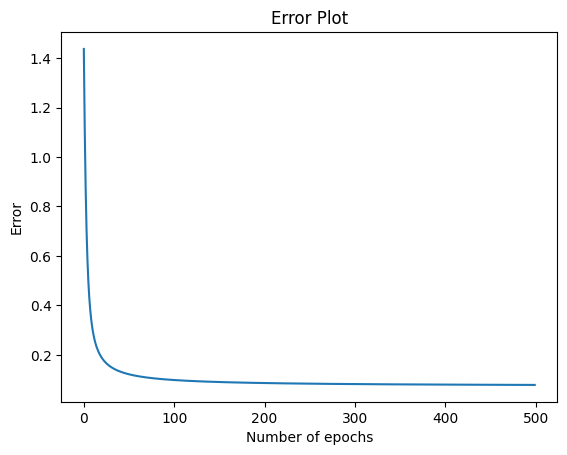

In [ ]:
# TODO: experiment with different learning rates !
learning_rates = [0.001, 0.01, 0.1, 0.3]

# Train the model with different learning rates
for lr in learning_rates:
    print(f"Training with learning rate: {lr}")
    train(X, y, epochs, lr, True)

## PART2: PyTorch 🛠️

PyTorch is an open-source deep learning library, widely used for applications such as computer vision and natural language processing. It is known for its flexibility and ease of use, especially when it comes to building and experimenting with neural network architectures. Developed by the Facebook AI Research lab, PyTorch provides two high-level features: Tensor computation (like NumPy) with strong GPU acceleration, and Deep Neural Networks built on a tape-based autograd system. It's particularly favored for its dynamic computational graph and efficient memory usage, which makes it a go-to tool for researchers and developers alike.

### Loading the MNIST Dataset
The MNIST dataset is a collection of 70,000 grayscale images of handwritten digits. We will load this dataset and prepare it for training our neural network. It is a "Hello, World!" of computer vision, providing a manageable dataset to train basic image processing and pattern recognition algorithms.

Let's dive into the data loading process!



In [ ]:
from torchvision import datasets, transforms
from torch.utils.data import DataLoader

# Transformations applied on each image
transform = transforms.Compose([transforms.ToTensor(),
                                transforms.Normalize((0.5,), (0.5,))])

# Loading MNIST dataset from torchvision
train_set = datasets.MNIST(root='./data', train=True, download=True, transform=transform)
train_loader = DataLoader(train_set, batch_size=64, shuffle=True)

# TODO: Load the test set (Use the same thing as train_set)
test_set = datasets.MNIST(root='./data', train=False, download=True, transform=transform)
test_loader = DataLoader(test_set, batch_size=64, shuffle=False)

## Displaying Images and Their Labels
Let's visualize some of the images in our dataset along with their corresponding labels.


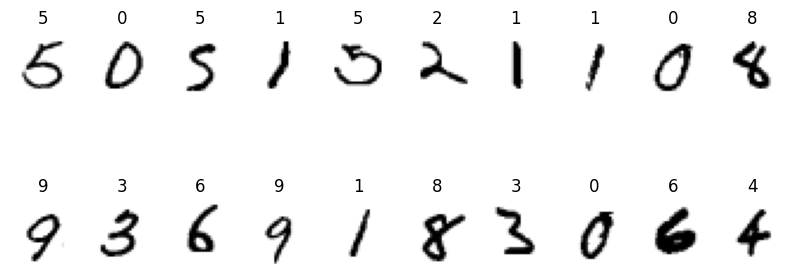

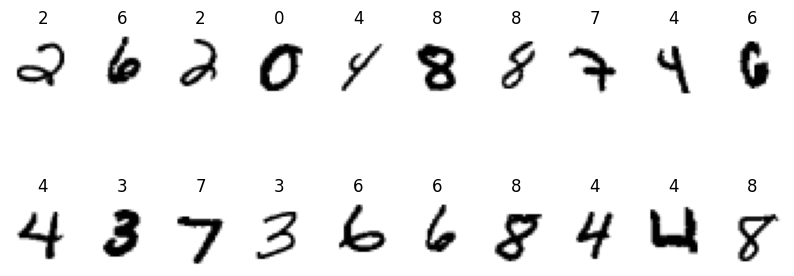

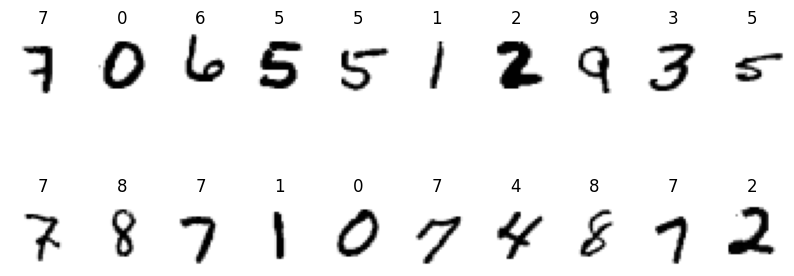

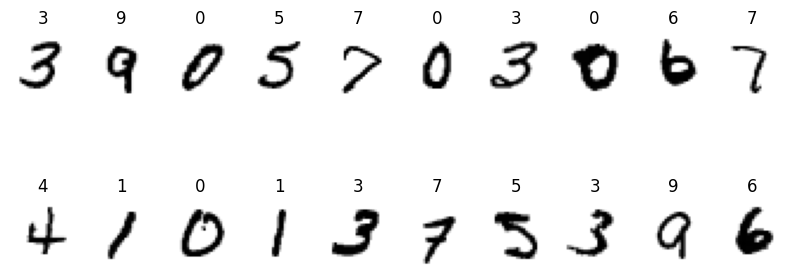

In [ ]:
import matplotlib.pyplot as plt

# Function to display images
def show_images(images, labels):
    plt.figure(figsize=(10, 4))
    for i in range(20):
        plt.subplot(2, 10, i+1)
        plt.imshow(images[i].numpy().squeeze(), cmap='gray_r')
        plt.title(labels[i].item())
        plt.axis('off')
    plt.show()

# Get some random training images
dataiter = iter(train_loader)
images, labels = next(dataiter)

# Display images
show_images(images, labels)

# TODO: Explore different batches and display their images and labels
for _ in range(3):  # Display images from 3 different batches
    dataiter = iter(train_loader)
    images, labels = next(dataiter)
    show_images(images, labels)

## Building a Fully Connected Neural Network
We will now define our neural network architecture. We'll start with a simple fully connected network with a single hidden layer.

When using an image in a fully connected neural network, we need to change its dimension.
![](https://miro.medium.com/v2/resize:fit:1400/1*IWUxuBpqn2VuV-7Ubr01ng.png)

In [ ]:
# TODO: Complete this code
# Fill the size of the input and output to the layer
import torch.nn as nn
import torch.nn.functional as F

# Neural network with a single fully connected layer
class SimpleNet(nn.Module):
    def __init__(self):
        super(SimpleNet, self).__init__()
        self.fc1 = nn.Linear(28*28,10 )  # TODO: Define the fully connected layer

    def forward(self, x):
        x = x.view(-1, 28*28)  # Flatten the image
        x = self.fc1(x)
        return F.log_softmax(x, dim=1)

# Create an instance of the network
model = SimpleNet()
print(model)


SimpleNet(
  (fc1): Linear(in_features=784, out_features=10, bias=True)
)


## Training the Model
Next, we'll define the training loop. We will train our model using gradient descent.


In [ ]:
# TODO: Complete this code
import torch.optim as optim

# Loss function and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(), lr=0.01)


# Training loop
for epoch in range(100):  # loop over the dataset multiple times
    running_loss = 0.0
    for images, labels in train_loader:
        # TODO: Complete the training loop
        images = images.view(-1, 28*28)
        optimizer.zero_grad()

        #forward pass
        outputs = model(images)
        loss = criterion(outputs, labels)
        running_loss += loss.item()
    print(f"Epoch {epoch+1}, Loss: {running_loss/len(train_loader)}")

# Print model's state_dict
print("Model's state_dict:")
for param_tensor in model.state_dict():
    print(param_tensor, "\t", model.state_dict()[param_tensor].size())


Epoch 1, Loss: 2.438395226688019
Epoch 2, Loss: 2.438377052482003
Epoch 3, Loss: 2.43834848876701
Epoch 4, Loss: 2.438339934166052
Epoch 5, Loss: 2.438399287683369
Epoch 6, Loss: 2.4384288764965816
Epoch 7, Loss: 2.4384855730955532
Epoch 8, Loss: 2.438467587489309
Epoch 9, Loss: 2.4384061736084504
Epoch 10, Loss: 2.4383683057227876
Epoch 11, Loss: 2.438402079315836
Epoch 12, Loss: 2.4384338194881674
Epoch 13, Loss: 2.43836805764546
Epoch 14, Loss: 2.438339726757139
Epoch 15, Loss: 2.4383768809121302
Epoch 16, Loss: 2.438370213833953
Epoch 17, Loss: 2.438480179955456
Epoch 18, Loss: 2.4382727052102973
Epoch 19, Loss: 2.43829991288785
Epoch 20, Loss: 2.4384512080312537
Epoch 21, Loss: 2.438417394278146
Epoch 22, Loss: 2.438435237799118
Epoch 23, Loss: 2.43846514509685
Epoch 24, Loss: 2.4384013915112788
Epoch 25, Loss: 2.4383841608124754
Epoch 26, Loss: 2.4383511345015405
Epoch 27, Loss: 2.4383850006152317
Epoch 28, Loss: 2.4383892036958543
Epoch 29, Loss: 2.4383671629403447
Epoch 30, Los

## Model Evaluation
Finally, let's evaluate the performance of our model on the test dataset.


In [ ]:
# TODO: Write the evaluation loop
import torch

correct = 0
total = 0
with torch.no_grad():
    for images, labels in test_loader:
        images = images.view(-1, 28*28)
        outputs = model(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

print(f'Accuracy of the network on the 10000 test images: {100 * correct / total:.2f}%')


Accuracy of the network on the 10000 test images: 12.31%


# Conclusion
In this notebook, we covered the basics of loading a dataset, visualizing it, building a simple neural network, and training it. We encourage you to experiment with different network architectures, learning rates, and other hyperparameters.

## Additional Resources
- [PyTorch Official Documentation](https://pytorch.org/docs/stable/index.html)
- [Deep Learning with PyTorch: A 60 Minute Blitz](https://pytorch.org/tutorials/beginner/deep_learning_60min_blitz.html)
- [Neural Networks and Deep Learning by Michael Nielsen](http://neuralnetworksanddeeplearning
